In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [48]:
df = pd.read_csv('Student_Satisfaction_Survey.csv',encoding='latin1')

In [49]:
#Cleaning and preprocessing
df.dropna()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
...,...,...,...,...,...,...,...,...,...,...,...,...
575,16,9,170,The institute/ teachers use student-centric me...,1,0,0,2,6,4.33 / 86.67,TYBSC,BACHELOR OF SCIENCE
576,17,9,170,Teachers encourage you to participate in extra...,0,0,0,3,6,4.67 / 93.33,TYBSC,BACHELOR OF SCIENCE
577,18,9,170,Efforts are made by the institute/ teachers to...,0,0,1,2,6,4.56 / 91.11,TYBSC,BACHELOR OF SCIENCE
578,19,9,170,What percentage of teachers use ICT tools such...,0,0,1,3,5,4.44 / 88.89,TYBSC,BACHELOR OF SCIENCE


In [50]:
df.isnull().sum()

SN                      0
Total Feedback Given    0
Total Configured        0
Questions               0
Weightage 1             0
Weightage 2             0
Weightage 3             0
Weightage 4             0
Weightage 5             0
Average/ Percentage     0
Course Name             0
Basic Course            0
dtype: int64

In [51]:
#Calculate the score 
df['Score'] = df['Total Feedback Given'] / df['Total Configured']
print(df['Score'])

0      0.083333
1      0.083333
2      0.083333
3      0.083333
4      0.083333
         ...   
575    0.052941
576    0.052941
577    0.052941
578    0.052941
579    0.052941
Name: Score, Length: 580, dtype: float64


In [52]:
df.describe()

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Score
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138,0.237520
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931,0.209127
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006944
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.066190
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.150000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000,0.335766
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000,0.772727


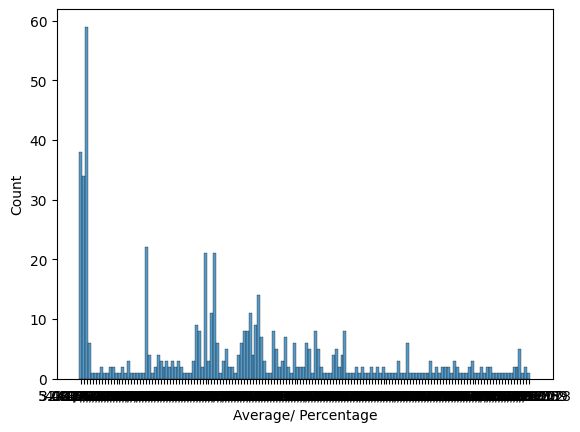

In [53]:
sns.histplot(x='Average/ Percentage',data=df)
plt.show()

In [54]:
df['overall_score']=df[['Weightage 1','Weightage 2','Weightage 3','Weightage 4','Weightage 5']].mean(axis=1)
print(df['overall_score'])

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
575    1.8
576    1.8
577    1.8
578    1.8
579    1.8
Name: overall_score, Length: 580, dtype: float64


count    580.000000
mean       0.527586
std        1.305336
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       19.000000
Name: Weightage 1, dtype: float64
count    580.000000
mean       1.187931
std        1.686334
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        8.000000
Name: Weightage 2, dtype: float64
count    580.000000
mean       2.537931
std        3.193302
min        0.000000
25%        0.000000
50%        1.000000
75%        3.250000
max       26.000000
Name: Weightage 3, dtype: float64
count    580.000000
mean       5.082759
std        7.288293
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       52.000000
Name: Weightage 4, dtype: float64
count    580.000000
mean       4.974138
std        6.494931
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       38.000000
Name: Weightage 5, dtype: float64


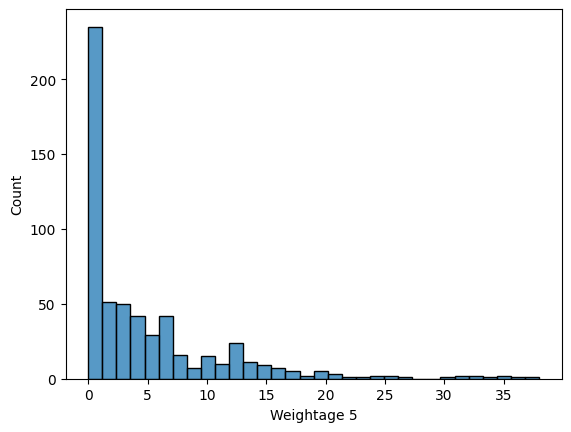

In [55]:
for column in ['Weightage 1','Weightage 2','Weightage 3','Weightage 4','Weightage 5']:
    print(df[column].describe())
sns.histplot(x=column,data=df)
plt.show()

In [56]:
#Sentimental analysis
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [57]:
analyze_sentiment_textblob('overall_score')

0.0

In [58]:
# Define a function for sentiment scoring
def sentiment_score(score):
    if score >= 0.8:
        return 'Positive'
    elif score >= 0.5 and score < 0.8:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to the Score column
df['Sentiment'] = df['Score'].apply(sentiment_score)

In [59]:
# Get the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

Sentiment
Negative    480
Neutral     100
Name: count, dtype: int64


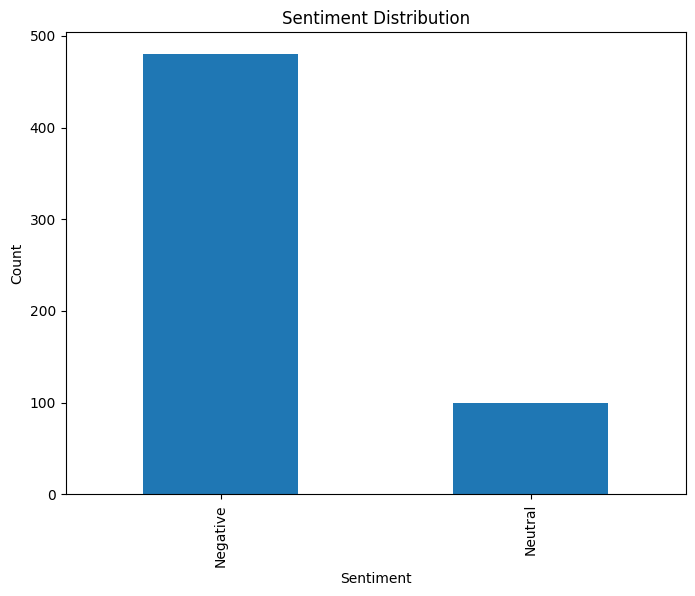

In [60]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(8,6))
sentiment_distribution.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [61]:
df.describe()

,SN,Total Feedback Given,Total Configured,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Score,overall_score
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,10.500000,14.310345,92.517241,0.527586,1.187931,2.537931,5.082759,4.974138,0.237520,2.862069
std,5.771259,16.488031,114.491780,1.305336,1.686334,3.193302,7.288293,6.494931,0.209127,3.297606
min,1.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006944,0.200000
25%,5.750000,3.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.066190,0.600000
50%,10.500000,7.000000,42.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.150000,1.400000
75%,15.250000,17.000000,123.000000,1.000000,2.000000,3.250000,6.000000,6.000000,0.335766,3.400000
max,20.000000,74.000000,559.000000,19.000000,8.000000,26.000000,52.000000,38.000000,0.772727,14.800000


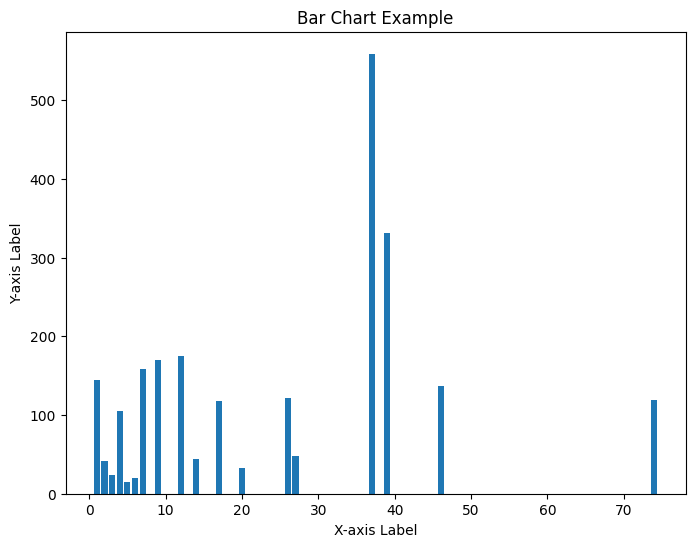

In [62]:
# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(df['Total Feedback Given'], df['Total Configured'])
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Bar Chart Example')
plt.show()

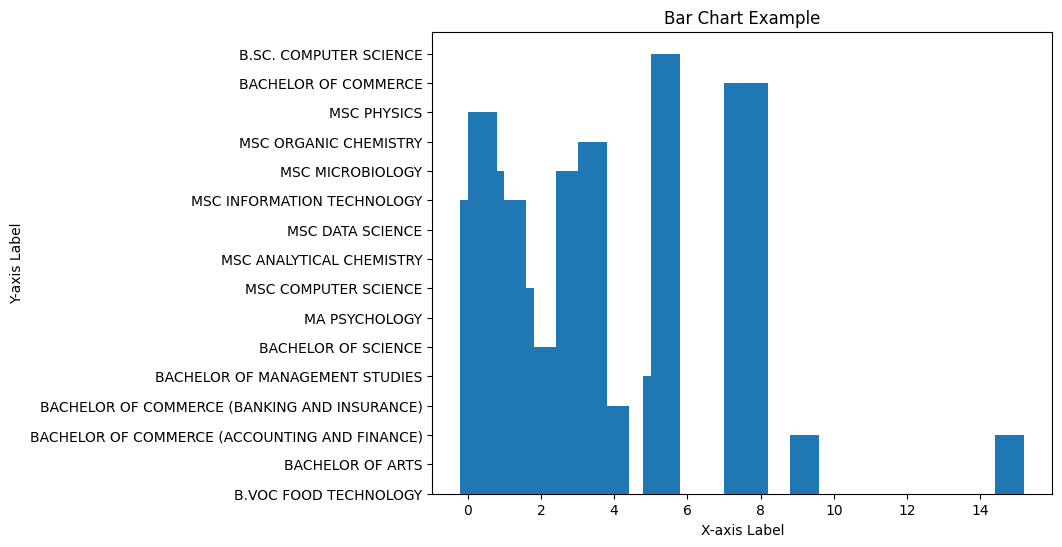

In [63]:
# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(df['overall_score'], df['Basic Course'])
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Bar Chart Example')
plt.show()

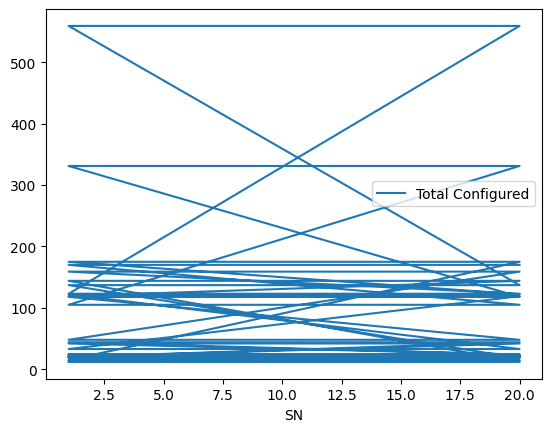

In [64]:
df.plot(x='SN',y='Total Configured',kind='line')
plt.show()

In [65]:
analyze_sentiment_textblob('SN')

0.0

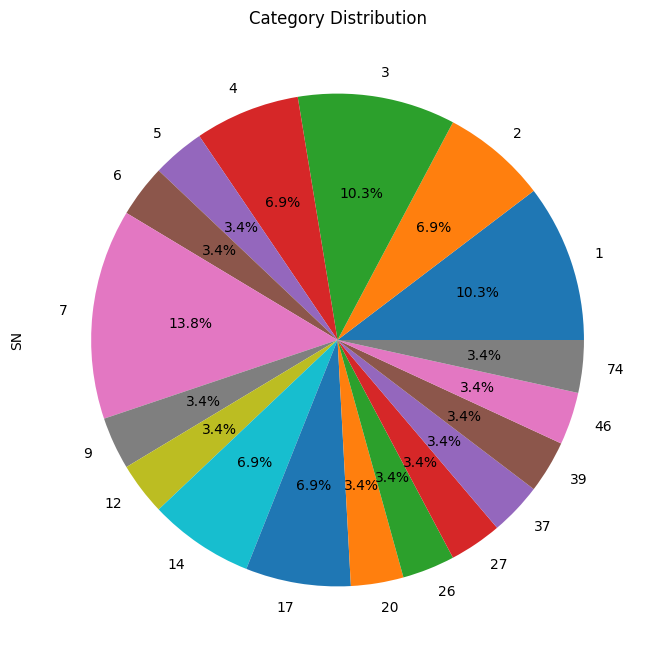

In [66]:
# Group the data by category and calculate the sum of values
counts = df.groupby('Total Feedback Given')['SN'].sum()

# Plot the pie chart
counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Category Distribution")
plt.show()

